# Tree-based models

首先介紹Decision Tree演算法，接著再比較各種樹模型(random forest, gradient boost tree, xgboost)。

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz
from xgboost import XGBClassifier
import xgboost as xgb

先用假造的簡單資料集如下：

In [2]:
data = pd.DataFrame({
    'is_default': [0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], 
    'is_male': [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    'is_fullpay': [1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0],
    'age': [28, 33, 22, 30, 51, 47, 49, 32, 24, 23, 42, 57]
})

In [3]:
data

,is_default,is_male,is_fullpay,age
0,0,1,1,28
1,1,1,1,33
2,1,1,0,22
3,1,1,0,30
4,0,1,1,51
5,0,1,1,47
6,0,0,0,49
7,0,0,1,32
8,1,0,1,24
9,0,0,1,23


In [4]:
X, y = data[['is_male','is_fullpay', 'age']].values, data['is_default'].values

## Decision Tree

直接使用scikit-learn的DecisionTreeClassifier，並且超參數都使用預設值。

In [5]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

可以看到Decision Tree可以很複雜，幾乎切割到每片葉子的不純度皆為0。

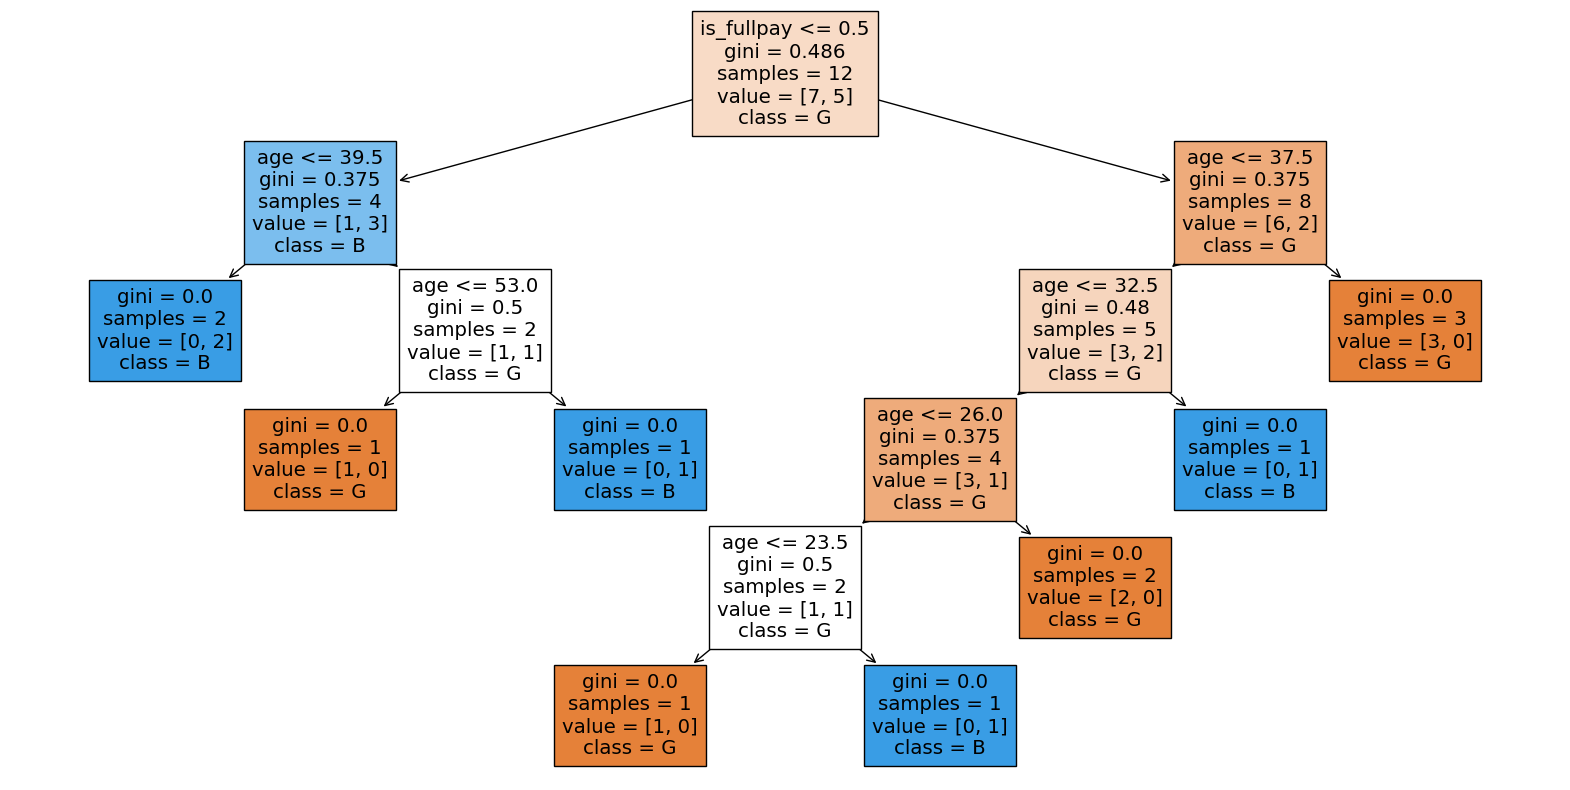

In [6]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['is_male','is_fullpay', 'age'], class_names=['G', 'B'], filled=True)
plt.show()

原因是超參數幾乎沒有對分割做限制，結果就是切割到不能再切為止。

In [7]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

嘗試加上分割限制，複雜度就降低很多了。

In [8]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(min_samples_split=4, max_depth=2, random_state=42)

# Train the classifier on the training data
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, min_samples_split=4, random_state=42)

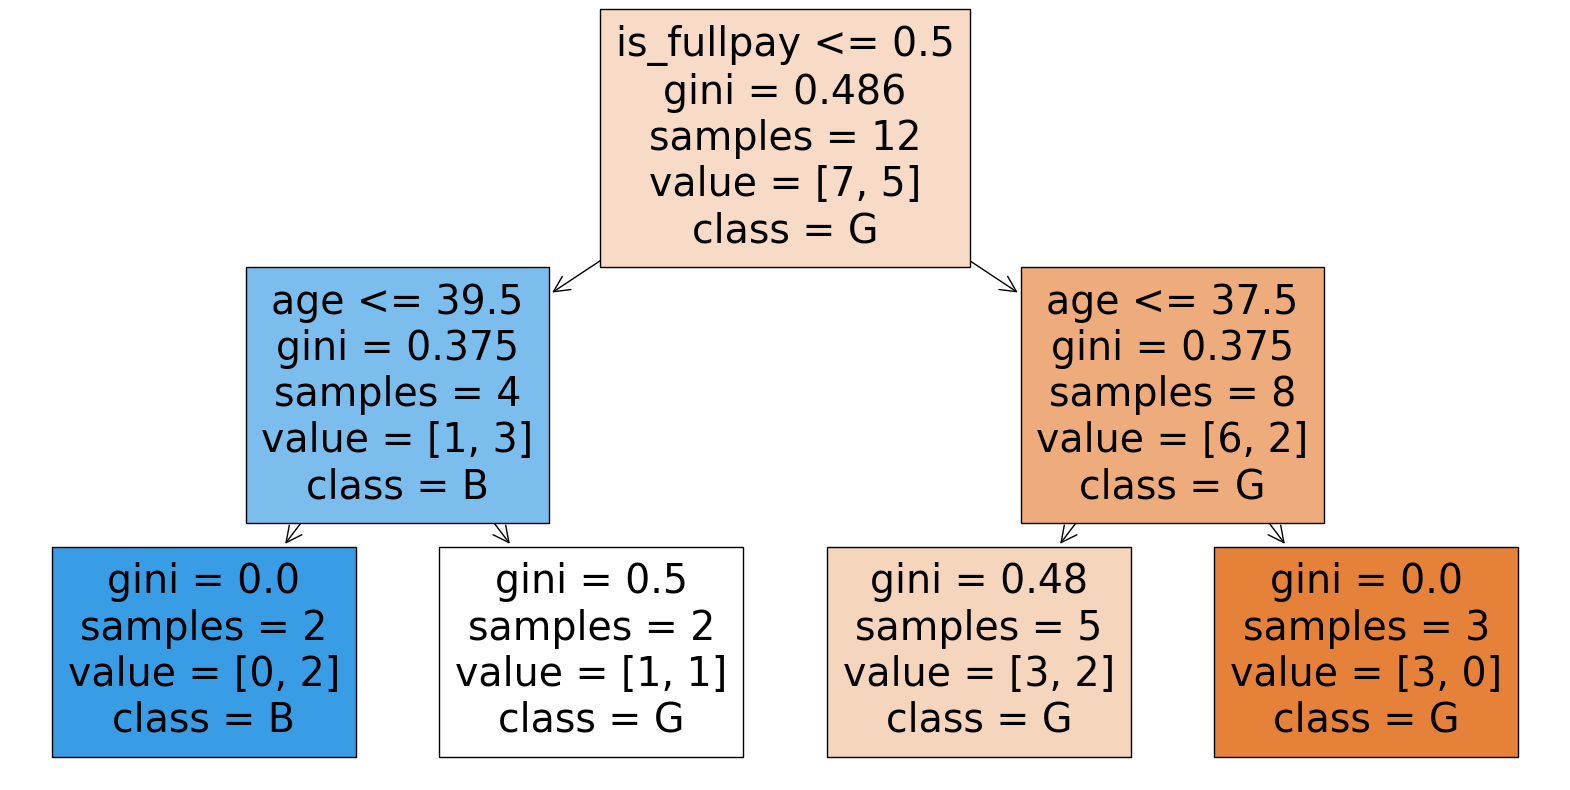

In [9]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['is_male','is_fullpay', 'age'], class_names=['G', 'B'], filled=True)
plt.show()

接著，使用跟上一份logistic regression一樣的資料集：breast cancer。

In [10]:
# Load the breast cancer dataset
cancer = load_breast_cancer()

X, y = cancer.data, cancer.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
# Predictions on the test set
y_pred = clf.predict(X_test)

In [15]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix array into a pandas DataFrame
cm_df = pd.DataFrame(cm.T, index=['Predicted 0', 'Predicted 1'], columns=['Actual 0', 'Actual 1'])

# Display the confusion matrix as a table
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
             Actual 0  Actual 1
Predicted 0        39         2
Predicted 1         4        69


In [16]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9473684210526315
Precision: 0.9452054794520548
Recall: 0.971830985915493
F1 Score: 0.9583333333333334


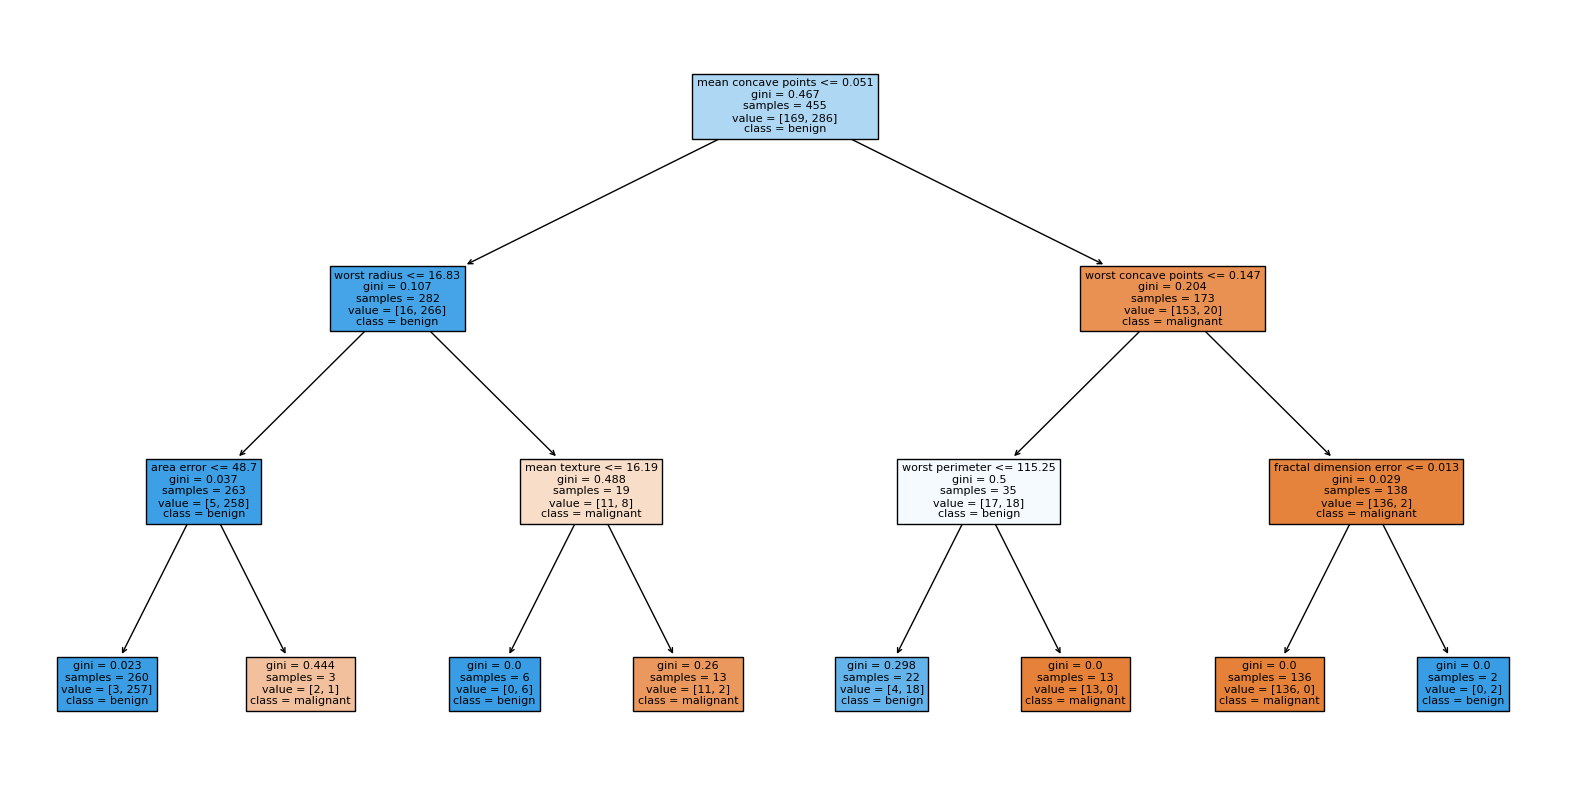

In [17]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.show()

## Random Forest

In [18]:
# Create a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=30, max_depth=2, random_state=42)

# Train the classifier on the training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=30, random_state=42)

In [19]:
# Predictions on the test set
y_pred = rf_clf.predict(X_test)

In [20]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix array into a pandas DataFrame
cm_df = pd.DataFrame(cm.T, index=['Predicted 0', 'Predicted 1'], columns=['Actual 0', 'Actual 1'])

# Display the confusion matrix as a table
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
             Actual 0  Actual 1
Predicted 0        39         1
Predicted 1         4        70


In [21]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793104


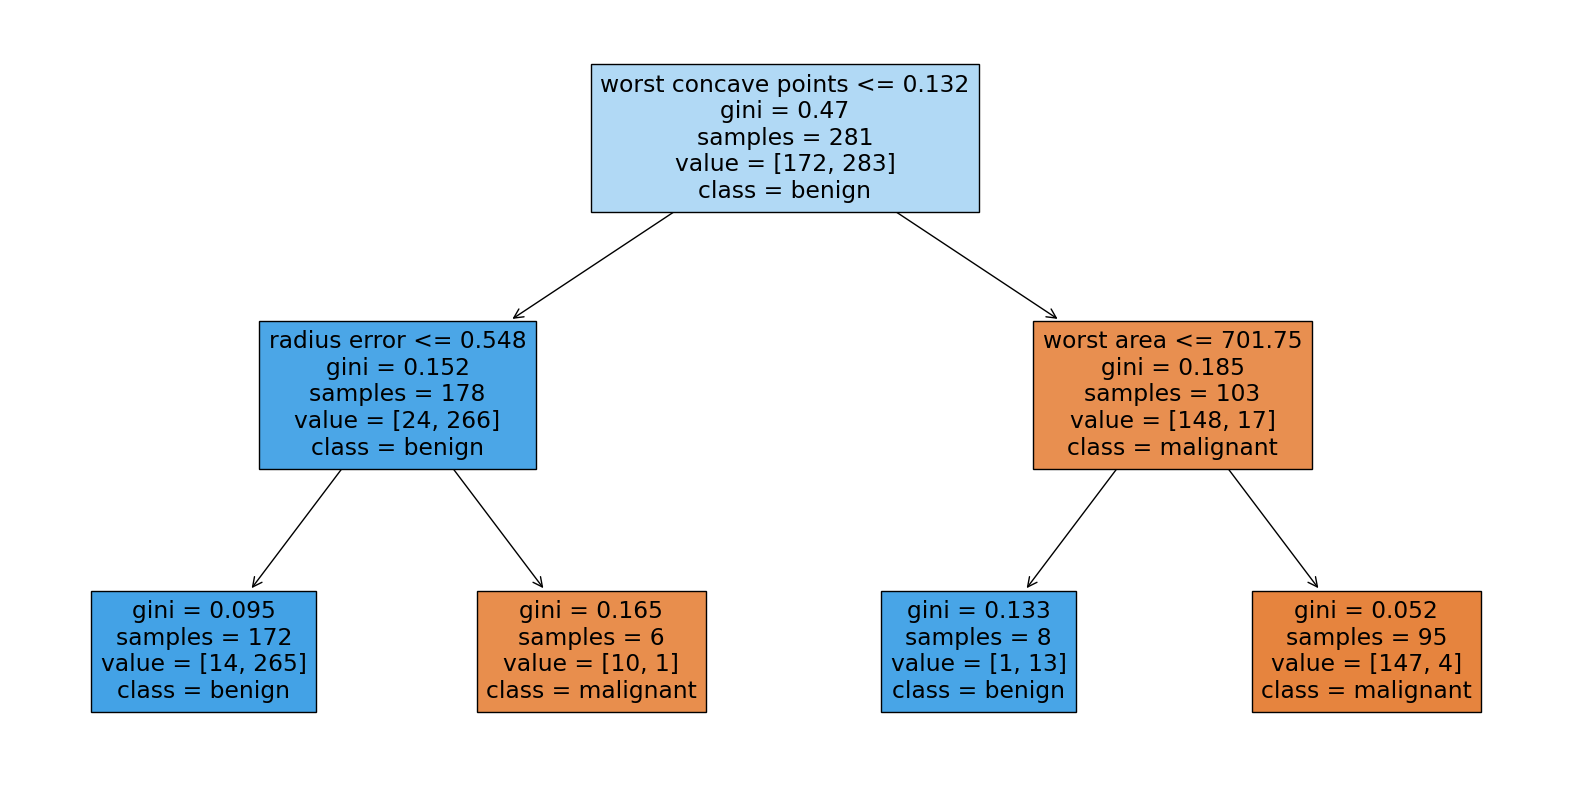

In [22]:
# Extract a single decision tree from the Random Forest
estimator = rf_clf.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(estimator, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.show()

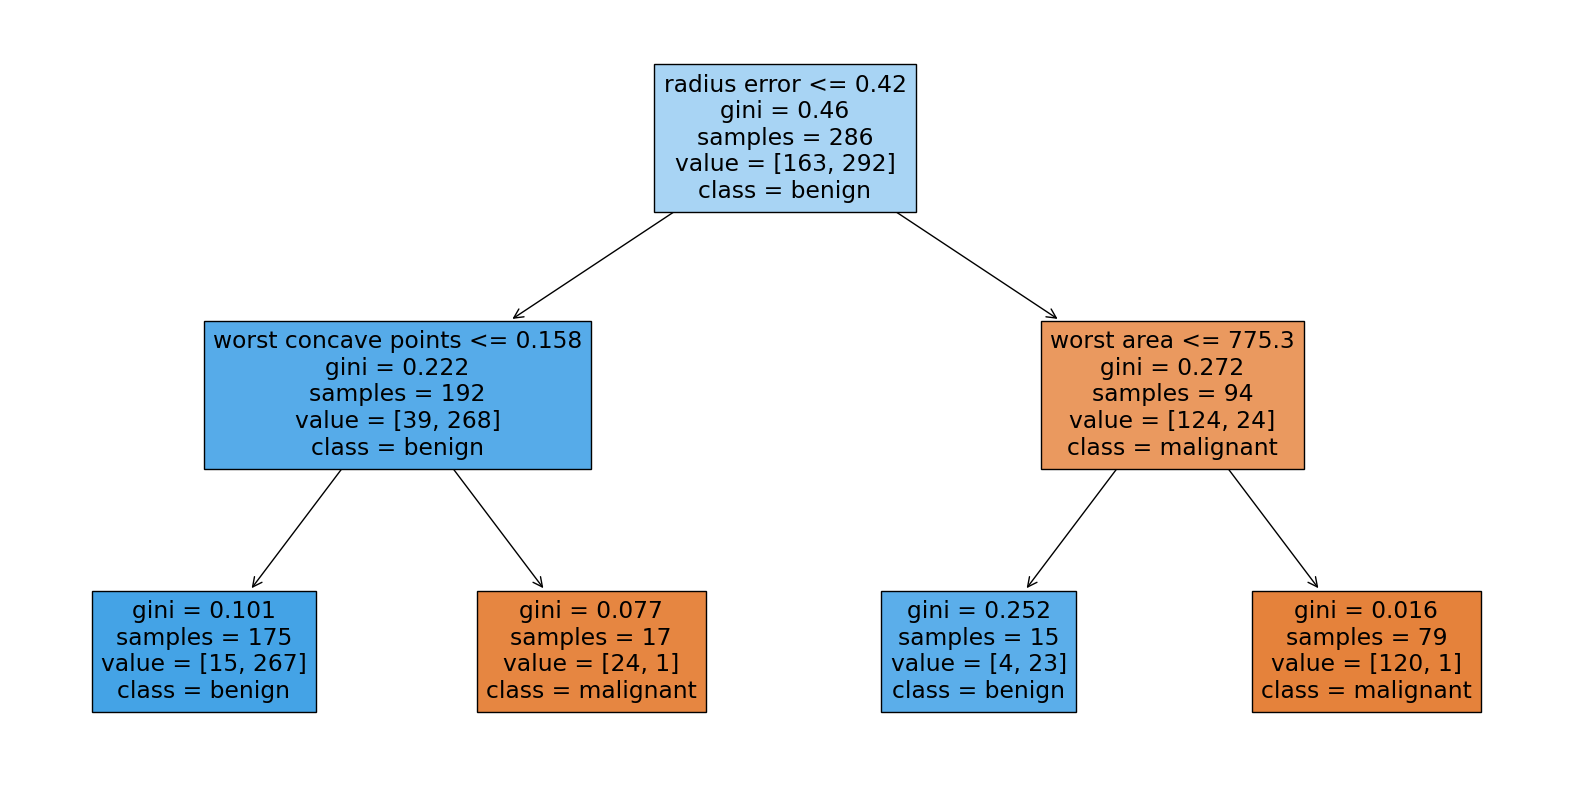

In [23]:
# Extract a single decision tree from the Random Forest
estimator = rf_clf.estimators_[1]

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(estimator, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.show()


## Gradient Boost Tree

In [24]:
# Create a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=30, max_depth=2, learning_rate=0.5, random_state=42)

# Train the classifier on the training data
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=30,
                           random_state=42)

In [25]:
# Predictions on the test set
y_pred = gb_clf.predict(X_test)

In [26]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix array into a pandas DataFrame
cm_df = pd.DataFrame(cm.T, index=['Predicted 0', 'Predicted 1'], columns=['Actual 0', 'Actual 1'])

# Display the confusion matrix as a table
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
             Actual 0  Actual 1
Predicted 0        40         1
Predicted 1         3        70


In [27]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


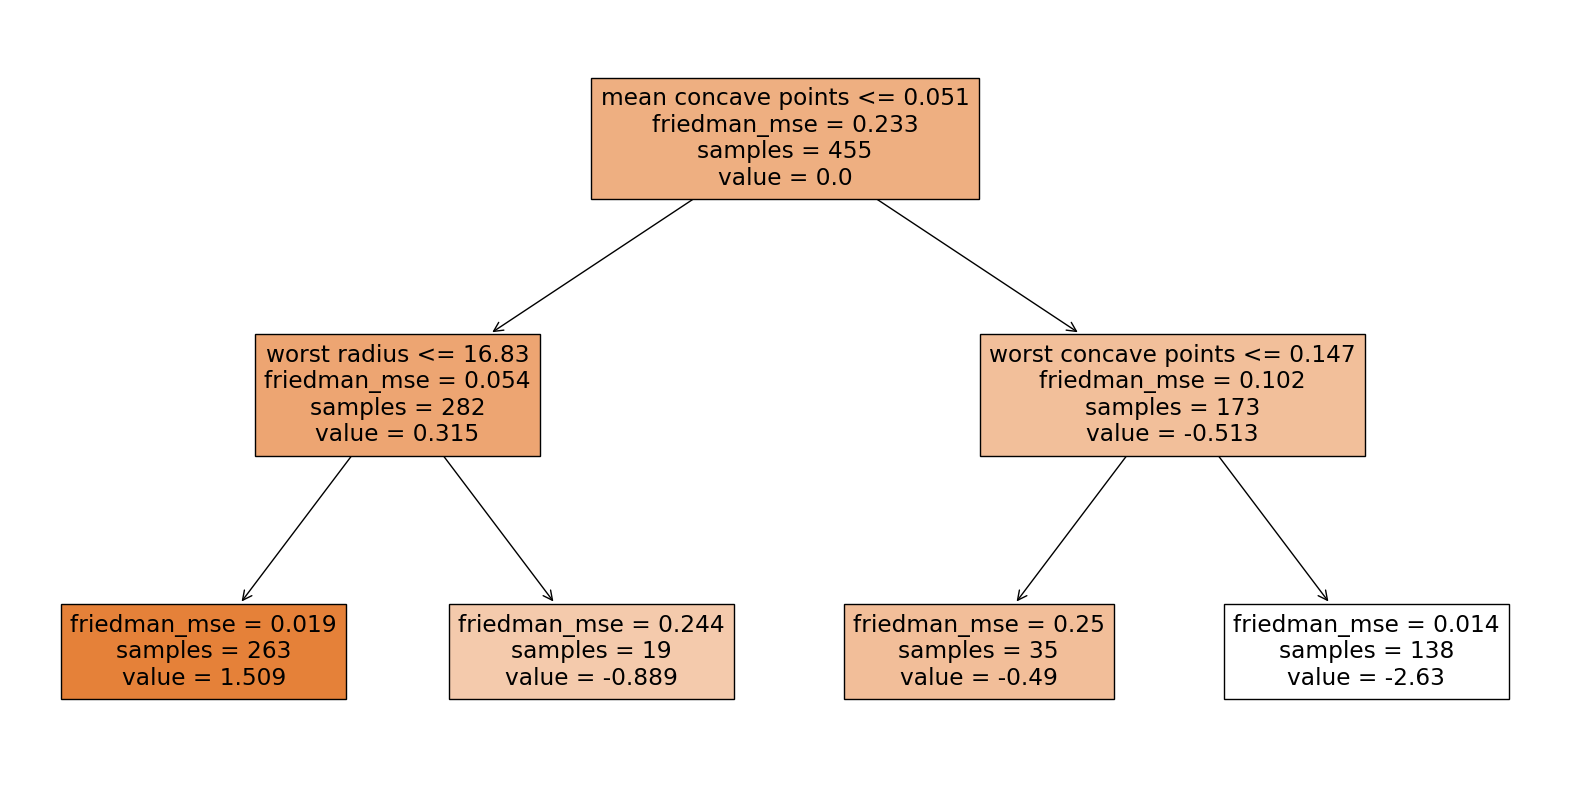

In [28]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(gb_clf.estimators_[0][0], feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.show()

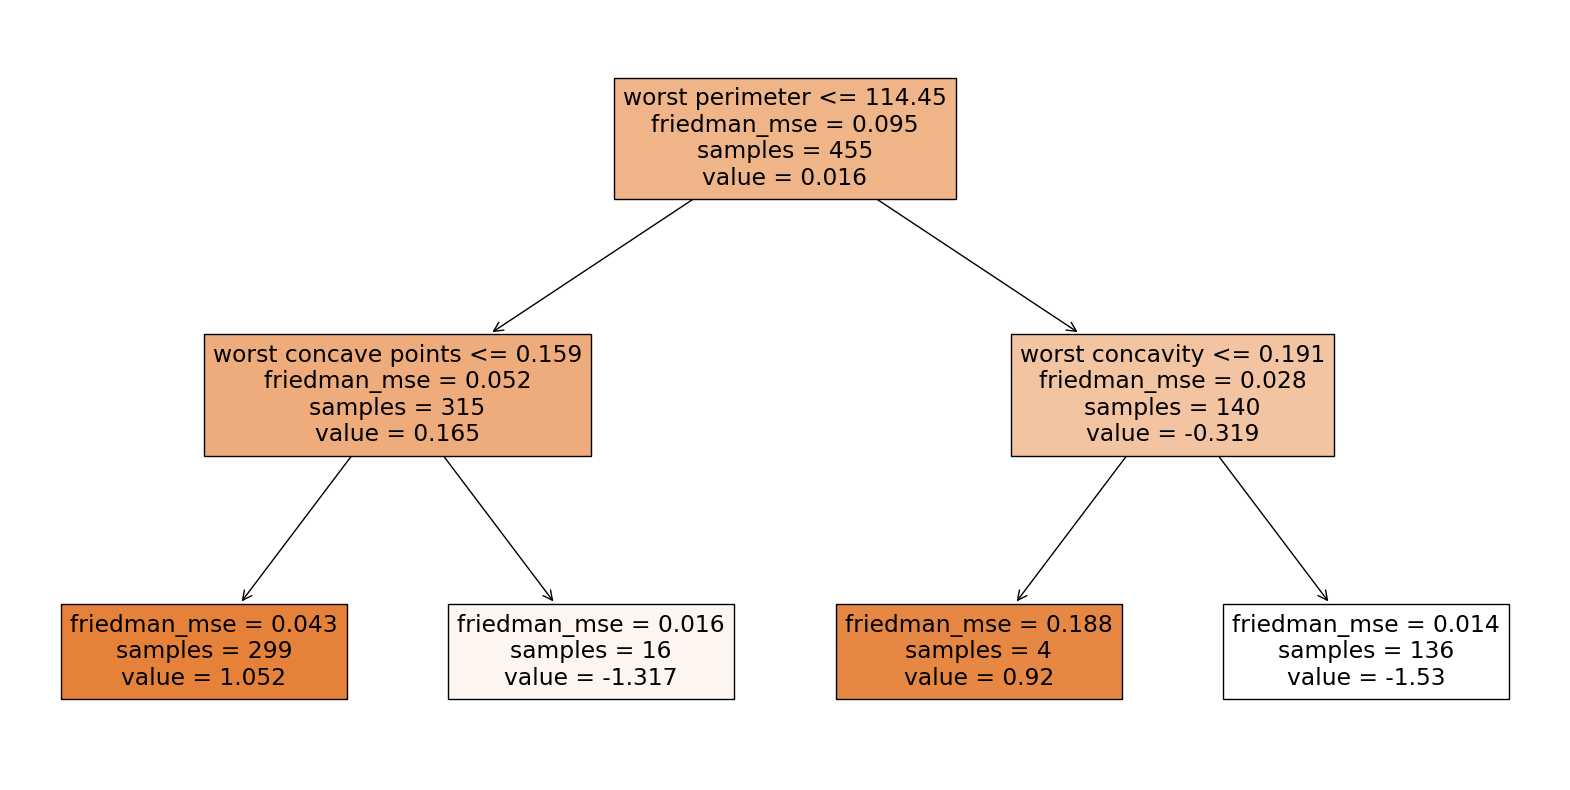

In [29]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(gb_clf.estimators_[1][0], feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.show()

## XGBoost

xgboost 是實現 gradient boosting 演算法的一個套件，其中細節有些不同，並且做了一些工程上的優化。

因為繪圖所需，這邊另外建一個有包含欄位名稱的DataFrame。

In [30]:
X_train_xgb = pd.DataFrame(X_train, columns=cancer.feature_names)

In [31]:
# XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=30, max_depth=2, learning_rate=0.8, random_state=42)

xgb_clf.fit(X_train_xgb, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [32]:
# Predictions on the test set
y_pred = xgb_clf.predict(X_test)

In [33]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix array into a pandas DataFrame
cm_df = pd.DataFrame(cm.T, index=['Predicted 0', 'Predicted 1'], columns=['Actual 0', 'Actual 1'])

# Display the confusion matrix as a table
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
             Actual 0  Actual 1
Predicted 0        41         2
Predicted 1         2        69


In [34]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9649122807017544
Precision: 0.971830985915493
Recall: 0.971830985915493
F1 Score: 0.971830985915493


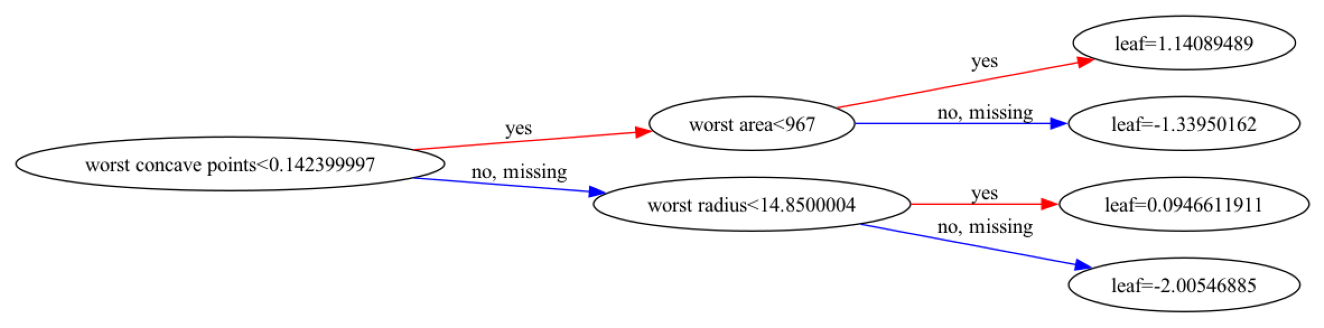

In [35]:
i = 0
xgb.plot_tree(xgb_clf, num_trees=i, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(24, 4)

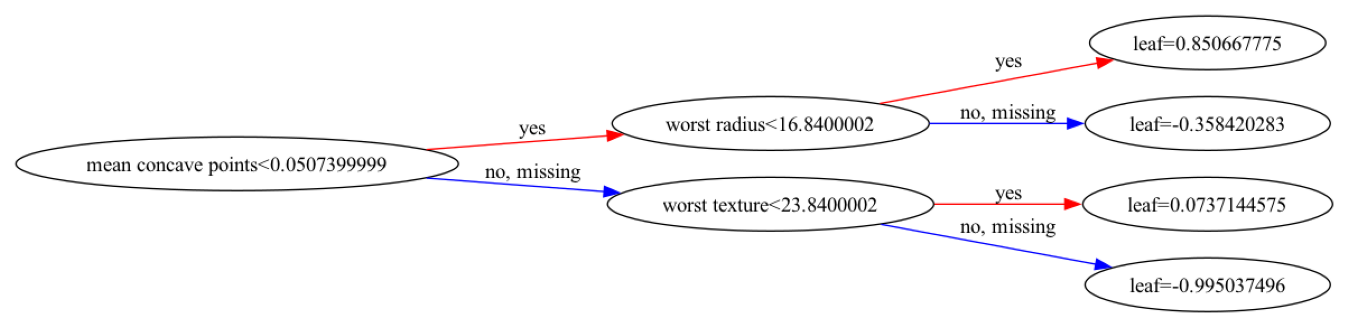

In [36]:
i = 1
xgb.plot_tree(xgb_clf, num_trees=i, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(24, 4)